In [1]:
import os
import pandas as pd

data_dir = "/home/tom/work/Development/cryptocurrency/data"
filenames = os.listdir(data_dir)
data = {}
for name in filenames:
    if '.csv' in name:
        filepath = os.path.join(data_dir, name)
        df = pd.read_csv(filepath)
        symbol = name.split('.')[0]
        data[symbol] = df

In [2]:
shapes =  []
for key in data.keys():
    shapes.append(data[key].shape + (key,))
shapes = sorted(shapes, key=lambda x: x[0], reverse=True)
symbols = [x[2] for x in shapes]

In [3]:
train_data = {}
for symbol in symbols[:10]:
    train_data[symbol] = data[symbol]

In [ ]:
from rltensor.environments import TradeEnv
from rltensor.configs import eiie_config
from rltensor.agents import EIIE
import tensorflow as tf


training_start = '2014-11-01 00:00:00'
training_end = '2016-09-07 04:00:00'
env = TradeEnv(train_data, start=training_start, end=training_end)

conf = dict(
    action_spec={"type": "float", "shape": env.action_dim},
    state_spec={"type": "float", "shape": (env.action_dim, 3)}
)

default_config = eiie_config()
conf.update(default_config)


fit_config = dict(
    start=training_start,
    end=training_end,
    # num_epochs=int(2e6),
    num_epochs=100,
    log_freq=1000)
    
tf.reset_default_graph()
eiie = EIIE(env=env, **conf)
eiie.fit(**fit_config)

/home/tom/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Building tensorflow graph...
Finished building tensorflow graph, spent time: 0.23875808715820312
Model saved in file: params/model.ckpt


  9%|▉         | 9/100 [00:00<00:01, 84.88it/s]

Finished storing data.


100%|██████████| 100/100 [00:00<00:00, 113.20it/s]

Model saved in file: params/model.ckpt


In [ ]:
test_start = '2016-09-07 04:00:00'
test_end = '2016-10-28 08:00:00'


eiie.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path=None,
             overwrite=True,
             log_freq=1,
             avg_length=100)

Model saved in file: params/model.ckpt


In [10]:
import numpy as np


np.array(eiie.memory.recent_observations).shape

(50, 10, 3)

In [ ]:
test_start = '2016-09-07 04:00:00'
test_end = '2016-10-28 08:00:00'

env.set_trange(start=test_start, end=test_end)

In [9]:
list(env.data.values())[0].shape

(34909, 7)

In [ ]:
from datetime import datetime

datetime_object = datetime.strptime('2017-10-01 00:00:00', '%Y-%m-%d %H:%M:%S')
s = time.mktime(datetime_object.timetuple())

In [16]:
from collections import defaultdict

columns = ['high', 'low', 'close']

dfs = defaultdict(lambda : [])
for key, val in train_env.data.items():
    for col in columns:
        dfs[col].append(val[[col]])

In [17]:
pd.concat(dfs["close"]).shape

(1414020, 1)

In [30]:
from copy import deepcopy
from collections import defaultdict

from rltensor.environments.utils import seconds2date

data = deepcopy(data)
symbols = list(data.keys())
# Build imputed data with columns key\
dfs = defaultdict(lambda: [])
for symbol, val in data.items():
    dates = val["date"].values
    dates = pd.DatetimeIndex([seconds2date(d) for d in dates])
    df = pd.DataFrame(val.values, index=dates, columns=val.columns)
    df = df.loc[~df.index.duplicated(keep='first')]
    for col in val.columns:
        if col != 'date':
            dfs[col].append(df[col])

In [31]:
x = dfs['close']

In [32]:
pd.concat(x, axis=1, keys=symbols)

,BTC_GRC,BTC_XPM,BTC_BURST,BTC_XBC,BTC_XRP,BTC_NEOS,BTC_BTS,BTC_BLK,BTC_SBD,BTC_RADS,...,BTC_BTCD,BTC_SC,BTC_BELA,BTC_XEM,BTC_CLAM,BTC_HUC,BTC_FLDC,BTC_PPC,BTC_NXT,BTC_XCP
2014-11-01 00:00:00,NaN,0.000435,7.300000e-07,0.002028,0.000014,0.000042,0.000051,0.000100,NaN,NaN,...,0.007130,NaN,2.800000e-07,NaN,0.000270,0.000018,NaN,0.002345,0.000056,0.009012
2014-11-01 00:30:00,NaN,0.000435,7.300000e-07,0.002028,0.000014,0.000042,0.000051,0.000100,NaN,NaN,...,0.007130,NaN,2.800000e-07,NaN,0.000270,0.000018,NaN,0.002345,0.000056,0.009012
2014-11-01 01:00:00,NaN,0.000435,7.300000e-07,0.001860,0.000014,0.000042,0.000051,0.000100,NaN,NaN,...,0.006140,NaN,2.800000e-07,NaN,0.000270,0.000018,NaN,0.002345,0.000056,0.009012
2014-11-01 01:30:00,NaN,0.000435,7.300000e-07,0.001860,0.000014,0.000042,0.000051,0.000100,NaN,NaN,...,0.006140,NaN,2.800000e-07,NaN,0.000270,0.000025,NaN,0.002345,0.000056,0.009012
2014-11-01 02:00:00,NaN,0.000435,7.300000e-07,0.001860,0.000014,0.000050,0.000051,0.000100,NaN,NaN,...,0.006300,NaN,2.800000e-07,NaN,0.000270,0.000025,NaN,0.002345,0.000056,0.009012
2014-11-01 02:30:00,NaN,0.000435,7.400000e-07,0.001860,0.000014,0.000050,0.000051,0.000100,NaN,NaN,...,0.006789,NaN,2.800000e-07,NaN,0.000270,0.000019,NaN,0.002380,0.000056,0.009012
2014-11-01 03:00:00,NaN,0.000435,7.300000e-07,0.001860,0.000014,0.000050,0.000051,0.000100,NaN,NaN,...,0.006789,NaN,2.800000e-07,NaN,0.000270,0.000023,NaN,0.002380,0.000056,0.009690
2014-11-01 03:30:00,NaN,0.000435,7.200000e-07,0.001860,0.000014,0.000050,0.000050,0.000100,NaN,NaN,...,0.006173,NaN,2.800000e-07,NaN,0.000270,0.000024,NaN,0.002350,0.000056,0.009690
2014-11-01 04:00:00,NaN,0.000435,7.200000e-07,0.001860,0.000014,0.000050,0.000050,0.000100,NaN,NaN,...,0.006173,NaN,2.800000e-07,NaN,0.000270,0.000024,NaN,0.002350,0.000056,0.009690
2014-11-01 04:30:00,NaN,0.000435,7.400000e-07,0.001860,0.000014,0.000050,0.000050,0.000100,NaN,NaN,...,0.006173,NaN,2.800000e-07,NaN,0.000270,0.000024,NaN,0.002350,0.000056,0.009690


In [6]:
import datetime, time

dt = datetime.datetime(2011, 10, 21, 0, 0)
s = time.mktime(dt.timetuple())

In [9]:
train_data.values()

dict_values([             date      high       low      open     close    volume  \
0      1414814400  0.000435  0.000435  0.000435  0.000435  0.000000   
1      1414816200  0.000435  0.000435  0.000435  0.000435  0.000000   
2      1414818000  0.000435  0.000435  0.000435  0.000435  0.000000   
3      1414819800  0.000435  0.000435  0.000435  0.000435  0.000000   
4      1414821600  0.000435  0.000435  0.000435  0.000435  0.000000   
5      1414823400  0.000435  0.000435  0.000435  0.000435  0.000000   
6      1414825200  0.000435  0.000435  0.000435  0.000435  0.000000   
7      1414827000  0.000435  0.000435  0.000435  0.000435  0.000000   
8      1414828800  0.000435  0.000435  0.000435  0.000435  0.000000   
9      1414830600  0.000435  0.000435  0.000435  0.000435  0.000000   
10     1414832400  0.000435  0.000435  0.000435  0.000435  0.000000   
11     1414834200  0.000435  0.000435  0.000435  0.000435  0.000000   
12     1414836000  0.000435  0.000435  0.000435  0.000435  0.000

In [3]:
test_st = '2017-10-01 00:00:00'
test_end = '2017-12-05 05:00:00'

fit_config = dict(
    start=test_st,
    end=test_end,
    num_epochs=1,
    log_freq=1)

eiie.play()

Model saved in file: params/model.ckpt
Model saved in file: params/model.ckpt


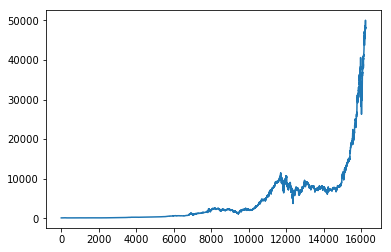

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(eiie.results["cumulative_returns"])

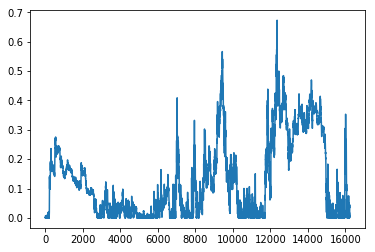

In [5]:
plt.plot(eiie.results["drawdowns"])

In [4]:
env.time_index[-1]

'2017-09-22'

In [9]:
eiie.results["cumulative_returns"]

[100.0,
 97.861291810580354,
 101.38405889884569,
 102.37013208516349,
 107.07274267408594,
 107.07273001820454,
 107.07273001820616,
 107.07273001820593,
 107.07273001820593,
 107.07273001820593,
 107.07273001820593,
 107.07273001820593,
 107.07273001820792,
 107.07273009448591,
 107.07273007781626,
 107.07273007781683,
 107.07273007781683,
 107.07273007781683,
 107.07273007782155,
 107.07273007782192,
 107.07273007782192,
 107.07273007782192,
 107.07273007784107,
 107.07273007784113,
 107.0727300778409,
 107.07273007783525,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.07273007783508,
 107.0

In [10]:
env.data

{'Cash':                      close  high  low  open  volume
 2017-01-01 00:00:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 00:30:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 01:00:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 01:30:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 02:00:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 02:30:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 03:00:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 03:30:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 04:00:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 04:30:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 05:00:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 05:30:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 06:00:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 06:30:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 07:00:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 07:30:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 08:00:00    1.0   1.0  1.0   1.0     1.0
 2017-01-01 08:30:00    1.0   1.0  1.0

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("/home/tomoaki/work/shared_crypto/data/2017_export_30min.csv")

In [16]:
import numpy as np

symbols = np.unique(df["currency_pair"].values)
data = {}
for symbol in symbols:
    data[symbol] = df.loc[df["currency_pair"]==symbol]

In [17]:
data

{'USDT_BCH':                       date     open     high      low    close       volume  \
 16235  2017-08-02 08:30:00   550.00   550.00   301.01   380.00   102.336905   
 16236  2017-08-02 09:00:00   380.00   395.91   301.01   389.00  1026.470976   
 16237  2017-08-02 09:30:00   389.00   435.00   370.00   405.00  1163.104283   
 16238  2017-08-02 10:00:00   410.00   447.90   405.00   425.00   702.585828   
 16239  2017-08-02 10:30:00   425.00   510.00   424.98   498.00  1451.411992   
 16240  2017-08-02 11:00:00   497.00   508.76   441.00   450.00  1765.647268   
 16241  2017-08-02 11:30:00   447.01   500.00   447.00   495.00  1657.109085   
 16242  2017-08-02 12:00:00   495.00   575.00   494.99   567.10  2442.769341   
 16243  2017-08-02 12:30:00   569.00   672.00   523.00   668.89  4589.973996   
 16244  2017-08-02 13:00:00   668.89   693.70   601.00   645.00  2689.383063   
 16245  2017-08-02 13:30:00   641.02   650.00   427.01   485.01  4318.754034   
 16246  2017-08-02 14:00:00 

In [32]:
type(dict)

type

In [34]:
class ValidatePolygon(type):
    def __new__(meta, name, bases, class_dict):
        print('meta', meta)
        print('name', name)
        print('bases', bases)
        print('class_dict', class_dict)
        if bases != (object,):
            if class_dict['sides'] < 3:
                raise ValueError('Polygons need 3+ sides')
        return type.__new__(meta, name, bases, class_dict)

In [38]:
class Polygon(object, metaclass=ValidatePolygon):
    sides = None
    
    @classmethod
    def interior_angles(cls):
        return (cls.sides - 2) * 180

meta <class '__main__.ValidatePolygon'>
name Polygon
bases (<class 'object'>,)
class_dict {'__module__': '__main__', '__qualname__': 'Polygon', 'sides': None, 'interior_angles': <classmethod object at 0x7f861fd76358>}


In [41]:
class Triangle(Polygon):
    sides = 1

meta <class '__main__.ValidatePolygon'>
name Triangle
bases (<class '__main__.Polygon'>,)
class_dict {'__module__': '__main__', '__qualname__': 'Triangle', 'sides': 1}


ValueError: Polygons need 3+ sides

In [42]:
import json


class BetterSerializable(object):
    def __init__(self, *args):
        self.args = args
        
    def serializable(self):
        return json.dumps({
            'class': self.__class__.__name__,
            'args': self.args
        })

In [44]:
registry = {}

def registry_class(target_class):
    registry[target_class.__name__] = target_class
    
def deserialize(data):
    params = json.loads(data)
    name = params['class']
    target_class = registry[name]
    return target_class(*params['args'])

In [47]:
class Meta(type):
    def __new__(meta, name, bases, class_dict):
        cls = type.__new__(meta, name, bases, class_dict)
        registry_class(cls)
        return cls

In [48]:
class RegisterSerializable(BetterSerializable, metaclass=Meta):
    pass

In [49]:
class Vector3D(RegisterSerializable):
    def __init__(self, x, y, z):
        super().__init__(x, y, z)
        self.x,  self.y, self.z = x, y, z

In [50]:
v3 = Vector3D(10, 3, -7)

In [51]:
v3

In [52]:
registry

{'RegisterSerializable': __main__.RegisterSerializable,
 'Vector3D': __main__.Vector3D}

In [53]:
data = v3.serializable()

In [55]:
data

'{"class": "Vector3D", "args": [10, 3, -7]}'

In [57]:
x = deserialize(data)

In [58]:
x.__dict__

{'args': (10, 3, -7), 'x': 10, 'y': 3, 'z': -7}